In [402]:
import numpy as np
import pandas as pd
import os

import os

import tensorflow as tf
import tensorflow_decision_forests as tfdf
print(f"Found TF-DF {tfdf.__version__}")

Found TF-DF 1.9.0


In [403]:
data = pd.read_csv("/Users/seanjoo/Desktop/horse/오 시팔.csv")
data.head()

,Unnamed: 0,rcDate,rcNo,rcDist,rank,budam,ageCond,weather,track,rcName,...,7_winRate,8_winRate,9_winRate,10_winRate,11_winRate,12_winRate,13_winRate,14_winRate,15_winRate,16_winRate
0,0,20190105,1,0,5,1,5,1,0,73,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1,20190105,2,0,5,1,5,1,0,73,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2,20190105,3,2,8,4,5,1,0,73,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,3,20190105,4,0,5,1,1,1,0,73,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,4,20190105,5,0,5,1,1,1,0,73,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [404]:
data = data.set_index(['rank', 'rcDist'])


In [405]:
data.to_csv("/Users/seanjoo/Desktop/horse/damn.csv") 

In [406]:
data.head()

Unnamed: 0    rcDate  rcNo  budam  ageCond  weather  track  \
rank rcDist                                                               
5    0                0  20190105     1      1        5        1      0   
     0                1  20190105     2      1        5        1      0   
8    2                2  20190105     3      4        5        1      0   
5    0                3  20190105     4      1        1        1      0   
     0                4  20190105     5      1        1        1      0   

             rcName  1_age  2_age  ...  7_winRate  8_winRate  9_winRate  \
rank rcDist                        ...                                    
5    0           73    4.0    4.0  ...        0.0        0.0        0.0   
     0           73    3.0    4.0  ...        0.0        0.0        0.0   
8    2           73    4.0    3.0  ...        0.0        0.0        0.0   
5    0           73    3.0    3.0  ...        0.0        0.0        0.0   
     0           73    3.0    3.0  ...        0.0        0.0        0.0   

             10_winRate  11_winRate  12_winRate  13_winRate  14_winRate  \
rank rcDist                                                               
5    0              0.0         0.0         0.0         NaN         NaN   
     0              0.0         0.0         0.0         NaN         NaN   
8    2              0.0         0.0         0.0         NaN         NaN   
5    0              0.0         0.0         0.0         NaN         NaN   
     0              0.0         0.0         0.0         NaN         NaN   

             15_winRate  16_winRate  
rank rcDist                          
5    0              NaN         NaN  
     0              NaN         NaN  
8    2              NaN         NaN  
5    0              NaN         NaN  
     0              NaN         NaN  

[5 rows x 184 columns]

In [407]:
filled_data = data.groupby(level=['rank', 'rcDist']).apply(lambda group: group.fillna(group.mean()))
filled_data.head()

Unnamed: 0    rcDate  rcNo  budam  ageCond  weather  \
rank rcDist rank rcDist                                                        
0    1      0    1               26  20190106    12      4        5        1   
                 1              261  20190324    11      4        5        1   
                 1              339  20190420    11      4        5        1   
                 1              523  20190616    11      4        5        1   
                 1              586  20190707    11      4        5        1   

                         track  rcName  1_age  2_age  ...  7_winRate  \
rank rcDist rank rcDist                               ...              
0    1      0    1           0      73    8.0    9.0  ...        0.0   
                 1           6      73    5.0    5.0  ...        0.0   
                 1           3      73    4.0    5.0  ...        0.0   
                 1           2      73    7.0    5.0  ...        0.0   
                 1           1      73    4.0    9.0  ...        0.0   

                         8_winRate  9_winRate  10_winRate  11_winRate  \
rank rcDist rank rcDist                                                 
0    1      0    1             0.0        0.0    0.000000         0.0   
                 1             0.0        0.0    0.000000         0.0   
                 1             0.0        0.0    0.000000         0.0   
                 1             1.0        0.0    0.285714         0.0   
                 1             0.0        0.0    1.000000         0.0   

                         12_winRate  13_winRate  14_winRate  15_winRate  \
rank rcDist rank rcDist                                                   
0    1      0    1              0.0         0.0         0.0         NaN   
                 1              0.0         0.0         0.0         NaN   
                 1              0.0         0.0         0.0         NaN   
                 1              0.2         0.0         0.0         NaN   
                 1              0.2         0.0         0.0         NaN   

                         16_winRate  
rank rcDist rank rcDist              
0    1      0    1              NaN  
                 1              NaN  
                 1              NaN  
                 1              NaN  
                 1              NaN  

[5 rows x 184 columns]

In [408]:
filled_data = filled_data.fillna(-1)

In [409]:
filled_data.to_csv("/Users/seanjoo/Desktop/horse/damn2.csv") 

In [410]:
data = filled_data.set_index('rcDate')

data = data.drop(columns= ['Unnamed: 0'])

In [411]:
data = data.reset_index()
data.head()

,rcDate,rcNo,budam,ageCond,weather,track,rcName,1_age,2_age,3_age,...,7_winRate,8_winRate,9_winRate,10_winRate,11_winRate,12_winRate,13_winRate,14_winRate,15_winRate,16_winRate
0,20190106,12,4,5,1,0,73,8.0,9.0,5.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,-1.0
1,20190324,11,4,5,1,6,73,5.0,5.0,9.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,-1.0
2,20190420,11,4,5,1,3,73,4.0,5.0,5.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,-1.0
3,20190616,11,4,5,1,2,73,7.0,5.0,7.0,...,0.0,1.0,0.0,0.285714,0.0,0.2,0.0,0.0,-1.0,-1.0
4,20190707,11,4,5,1,1,73,4.0,9.0,4.0,...,0.0,0.0,0.0,1.000000,0.0,0.2,0.0,0.0,-1.0,-1.0


In [412]:
data = data.sort_values("rcDate")
data = data.drop(columns = ['rcDate'])

train_data = data[data.index <= 880]
test_data = data[data.index > 880]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [413]:
data.to_csv("/Users/seanjoo/Desktop/horse/damn2.csv") 

In [414]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split


# Split the data into train and test sets
X_train = train_data.drop([f'{i}_ord' for i in range(1, 17)], axis=1)
y_train = train_data[[f'{i}_ord' for i in range(1, 17)]]
y_test = test_data[[f'{i}_ord' for i in range(1, 17)]]
X_test = test_data.drop([f'{i}_ord' for i in range(1, 17)], axis=1)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 6.169623000487814
Mean Absolute Error: 1.725196150448424


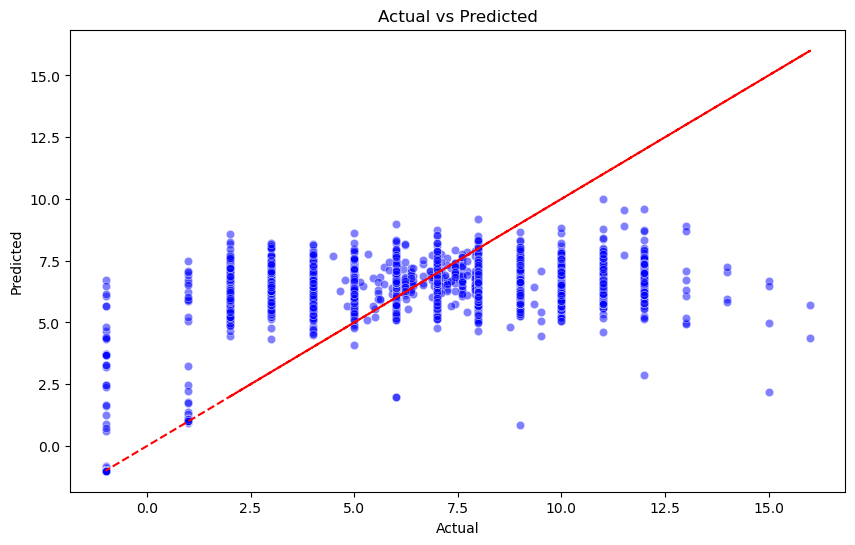

In [415]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot actual vs predicted values
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=result_df, color='blue', alpha=0.5)
plt.plot(result_df['Actual'], result_df['Actual'], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [420]:
features = X_train.columns
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Set the importance as index
feature_importance_df = feature_importance_df.set_index('Importance')

# Sort the DataFrame by index (importance) in descending order
feature_importance_df = feature_importance_df.sort_index(ascending=False)
feature_importance_df['Feature'] = [feature.split('_')[1] if '_' in feature else feature for feature in feature_importance_df['Feature']]

# Display the DataFrame
feature_importance_df=feature_importance_df.reset_index()
feature_importance_df['Feature']

0      diffUnit
1      diffUnit
2      diffUnit
3      diffUnit
4      diffUnit
         ...   
161     wgBudam
162        wgJk
163     winRate
164         age
165         sex
Name: Feature, Length: 166, dtype: object

In [417]:
feature_importance_df.shape

(166, 2)

In [418]:
features_of_interest = ["budam", "ageCond", "weather", "track", "rcName"]
feature_importance_df[feature_importance_df['Feature'].isin(features_of_interest)]

,Importance,Feature
35,0.007590,track
114,0.002388,budam
118,0.002194,ageCond
124,0.001807,weather
140,0.001031,rcName


In [421]:
feature_importance_df = feature_importance_df.groupby('Feature').mean().sort_values(by='Importance', ascending=False)
feature_importance_df.reset_index()


#diffUnit 저번 3,4경기()에서 diffUnit 작은  * 순위에서 몇위
# 아슬아슬했냐 아니냐  <-diffUnit 
    # 작음의 기준
# 능력이 값어치가 있나 <- 순위 
# 3,4경기 <- 4경기 이상 안뛴말이 많음(1년 기준)
# feature 100개 (Random) test, hypothesis 
# randomforest, 필요없는 column data 버리고 쓸모있는 column data 찾을수 있지 않을까? 
    # hr wasting > computational power 
# How to know whether a feature is ACTUALLY Good?
    # control, independent, dependent 
    # run_model
# track, wgHr()다시해야돼, rcNo(),)


# Valid diffUnit prediction model(diffUnit feature (feature))



,Feature,Importance
0,diffUnit,0.022335
1,wgHr,0.008272
2,track,0.007590
3,birthday,0.006629
4,rcNo,0.005828
5,wgBudam,0.005674
6,rcTime,0.005650
7,sex,0.003232
8,rating,0.003208
9,age,0.002584
